In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ua = pd.read_csv("../data/user_acquisition.csv")
installs = pd.read_csv("../data/installs.csv")
retention = pd.read_csv("../data/retention.csv")
purchases = pd.read_csv("../data/purchases.csv")


📊 Creative Based Campaign Summary
  creative_id     spend  impressions  clicks  installs       CPI       CTR  \
0           A  10989.27       695618   20463      7709  1.425512  0.029417   
1           B   7779.19       605991   15945      6334  1.228164  0.026312   
2           C   8861.31       520407   15861      6684  1.325750  0.030478   
3           D   8581.24       564583   17120      6538  1.312518  0.030323   

        CVR  
0  0.376729  
1  0.397241  
2  0.421411  
3  0.381893  

💰 Total Revenue: 7601.72
📥 Total Installation (Unique User): 1000
📈 Average Income (LTV Proxy): 7.60

🔄 D1 Retention Rate: 60.90%
🔄 D7 Retention Rate: 27.90%
🔄 D30 Retention Rate: 8.20%


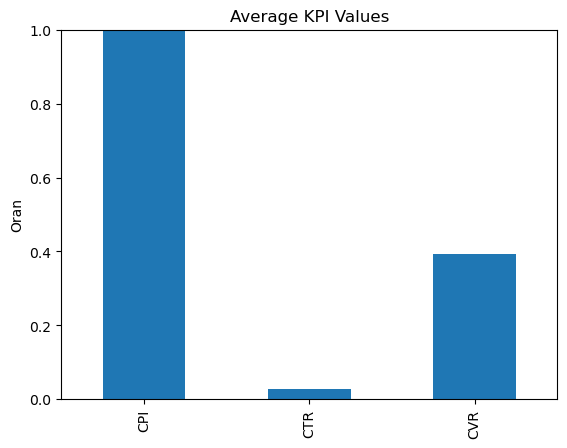

In [18]:

if 'cost' in ua.columns and 'spend' not in ua.columns:
    ua.rename(columns={"cost": "spend"}, inplace=True)

if 'revenue' not in purchases.columns and 'amount' in purchases.columns:
    purchases.rename(columns={'amount': 'revenue'}, inplace=True)

# --- Creative-based campaign performance ---

creative_summary = ua.groupby("creative_id").agg({
    "spend": "sum",
    "impressions": "sum",
    "clicks": "sum",
    "installs": "sum"
}).reset_index()

creative_summary["CPI"] = creative_summary["spend"] / creative_summary["installs"].replace(0, np.nan)
creative_summary["CTR"] = creative_summary["clicks"] / creative_summary["impressions"].replace(0, np.nan)
creative_summary["CVR"] = creative_summary["installs"] / creative_summary["clicks"].replace(0, np.nan)

print("📊 Creative Based Campaign Summary")
print(creative_summary.head())

# --- User-based performance analysis ---

user_perf = installs.merge(purchases, on="user_id", how="left").fillna({"revenue": 0})

total_revenue = user_perf["revenue"].sum()
total_installs = installs["user_id"].nunique()

print(f"\n💰 Total Revenue: {total_revenue}")
print(f"📥 Total Installation (Unique User): {total_installs}")
print(f"📈 Average Income (LTV Proxy): {total_revenue / total_installs:.2f}")

# --- Funnel analyze (Retention) ---

d1_retention_rate = retention['d1_retained'].mean()
d7_retention_rate = retention['d7_retained'].mean()
d30_retention_rate = retention['d30_retained'].mean()

print(f"\n🔄 D1 Retention Rate: {d1_retention_rate:.2%}")
print(f"🔄 D7 Retention Rate: {d7_retention_rate:.2%}")
print(f"🔄 D30 Retention Rate: {d30_retention_rate:.2%}")

# --- KPIs ---

kpis = creative_summary[["CPI", "CTR", "CVR"]].mean()

kpis.plot(kind='bar', title='Average KPI Values')
plt.ylabel('Oran')
plt.ylim(0, 1)
plt.show()